# Section 1: Data Analysis and Modeling

## Task 1: Data Cleaning and Transformation

### Import Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel('Flipkart Mobile Data.xlsx')

In [6]:
df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [10]:
df.shape

(430, 16)

### Handling Missing Values

In [11]:
df.isnull().sum()

brand               0
model               0
base_color          0
processor           0
screen_size         0
ROM                 0
RAM                 0
display_size        0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
sales               0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

### Statastical Summary

In [13]:
numerical_summary = df.describe().transpose()
numerical_summary

,count,mean,std,min,25%,50%,75%,max
ROM,430.0,105.748837,63.164064,8.00,64.00,128.000,128.0000,512.00
RAM,430.0,5.320930,2.182635,1.00,4.00,4.000,6.0000,12.00
display_size,430.0,6.369767,0.369549,4.70,6.30,6.500,6.5000,7.60
num_rear_camera,430.0,2.904651,0.952350,1.00,2.00,3.000,4.0000,4.00
num_front_camera,430.0,1.044186,0.227280,1.00,1.00,1.000,1.0000,3.00
battery_capacity,430.0,4529.397674,986.907252,1800.00,4000.00,4500.000,5000.0000,7000.00
ratings,430.0,4.339302,0.151494,3.00,4.30,4.300,4.4000,4.60
num_of_ratings,430.0,23567.944186,56096.277784,4.00,745.00,5197.500,21089.2500,642373.00
sales_price,430.0,25433.234884,22471.926588,5742.00,11999.00,16989.500,28999.0000,157999.00
discount_percent,430.0,0.108000,0.073432,0.01,0.06,0.090,0.1600,0.44


### Encoding

In [14]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,brand,model,base_color,processor,screen_size
0,Apple,iPhone SE,Black,Water,Very Small
1,Apple,iPhone 12 Mini,Red,Ceramic,Small
2,Apple,iPhone SE,Red,Water,Very Small
3,Apple,iPhone XR,Others,iOS,Medium
4,Apple,iPhone 12,Red,Ceramic,Medium
...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium


In [15]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'brand':
['Apple' 'Poco' 'Realme' 'Samsung' 'Xiaomi']

Unique values in 'model':
['iPhone SE' 'iPhone 12 Mini' 'iPhone XR' 'iPhone 12' 'iPhone 8'
 'iPhone 7 Plus' 'C3' 'M3' 'M2 Reloaded' 'X3 Pro' 'M3 Pro 5G' 'M2 Pro'
 'F3 GT' 'X3' 'F1' 'M2' 'X2' 'C20' 'C11 2021' 'C21Y' 'Narzo 30 5G' 'C21'
 'Narzo 30' '8s 5G' 'Narzo 30A' '8 5G' '8 Pro' 'C15' 8 'GT Master Edition'
 'X7 5G' 7 'Narzo 30 Pro 5G' 'C12' 'C11' 'X7 Max' 'GT 5G' '5 Pro' '3i'
 'Narzo 20 Pro' '7 Pro' 'X3 SuperZoom' 'X7 Pro 5G' 'C2' 6 '6i' 'C25'
 'Narzo 20' 'Narzo 10A' 'Narzo 20A' 'Narzo 10' 'Galaxy F22' 'Galaxy F12'
 'M02s' 'Galaxy M02' 'Galaxy A22' 'Galaxy A52s 5G' 'Galaxy M32'
 'Galaxy Z Flip3 5G' 'Galaxy A22 5G' 'Galaxy A21s' 'Galaxy A03s'
 'Galaxy M31' 'Galaxy A51' 'Galaxy A72' 'Galaxy A12' 'Galaxy F62'
 'Galaxy A31' 'Galaxy A52' 'Galaxy F02s' 'Galaxy M11' 'Galaxy F41'
 'Galaxy A71' 'Galaxy Note 20' 'Galaxy Z Fold3 5G' 'Galaxy M01'
 'Galaxy A50s' 'Galaxy Note 20 Ultra 5G' 'Galaxy S20 FE' 'Galaxy Grand 2'
 'Gal

In [16]:
df.columns

Index(['brand', 'model', 'base_color', 'processor', 'screen_size', 'ROM',
       'RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

In [20]:
label_encoder = LabelEncoder()

columns_to_encode = ['brand', 'model', 'base_color', 'processor', 'screen_size']

df[columns_to_encode] = df[columns_to_encode].astype(str)

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,0,117,0,5,4,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,0,114,8,0,2,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,0,117,8,5,4,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,0,118,6,6,1,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,0,113,8,0,1,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [21]:
df.shape

(430, 16)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    int64  
 1   model             430 non-null    int64  
 2   base_color        430 non-null    int64  
 3   processor         430 non-null    int64  
 4   screen_size       430 non-null    int64  
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(12)
memory usage: 53.9 

## Task 2: Statistical Modeling

## EDA

### Univariate Analysis 
### Visualize the distribution of the 'sales_price' column

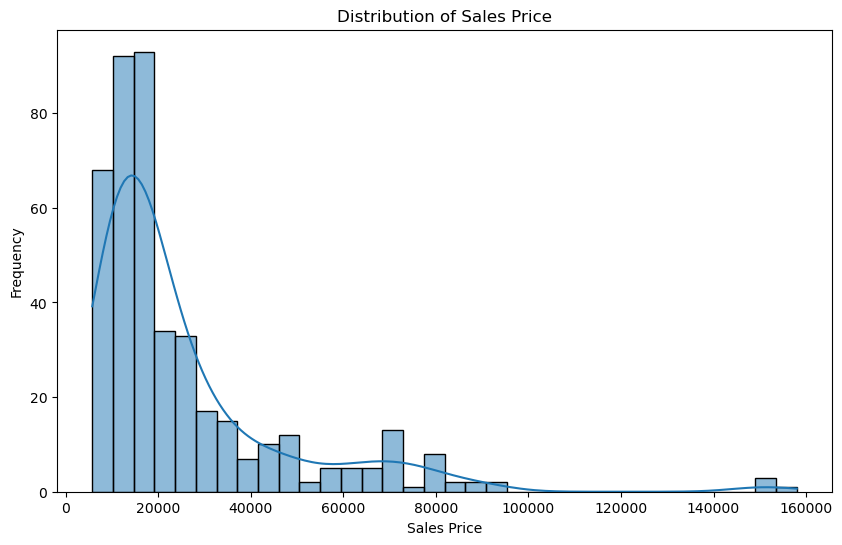

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sales_price'], kde=True)
plt.title('Distribution of Sales Price')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()

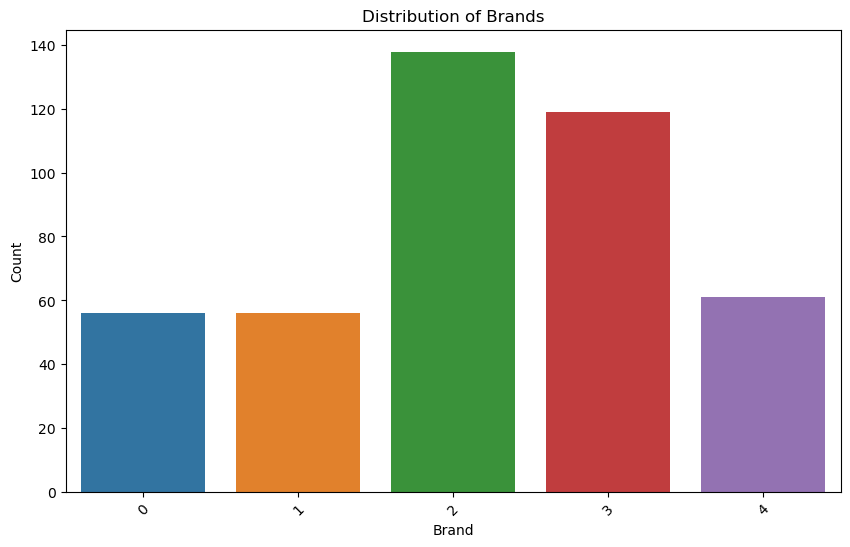

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='brand', data=df)
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis
### Relationship between sales price and ratings

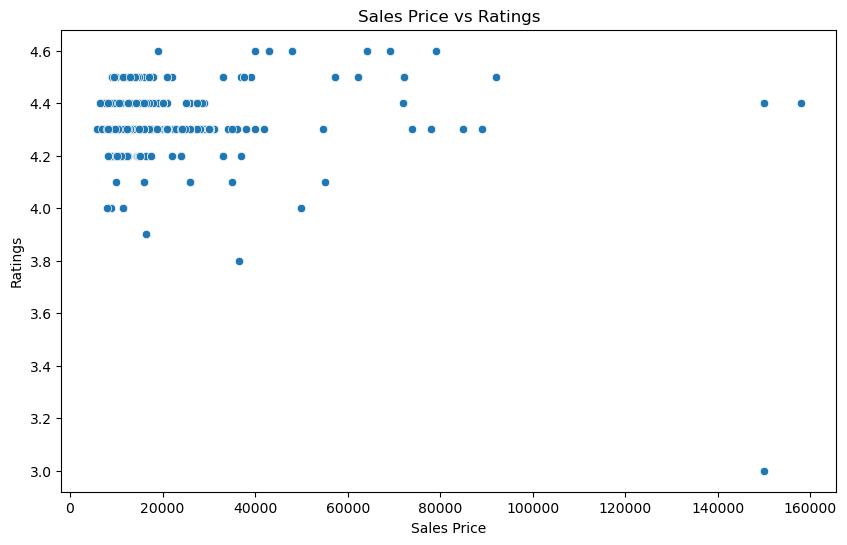

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales_price', y='ratings', data=df)
plt.title('Sales Price vs Ratings')
plt.xlabel('Sales Price')
plt.ylabel('Ratings')
plt.show()

### Relationship between sales price and RAM

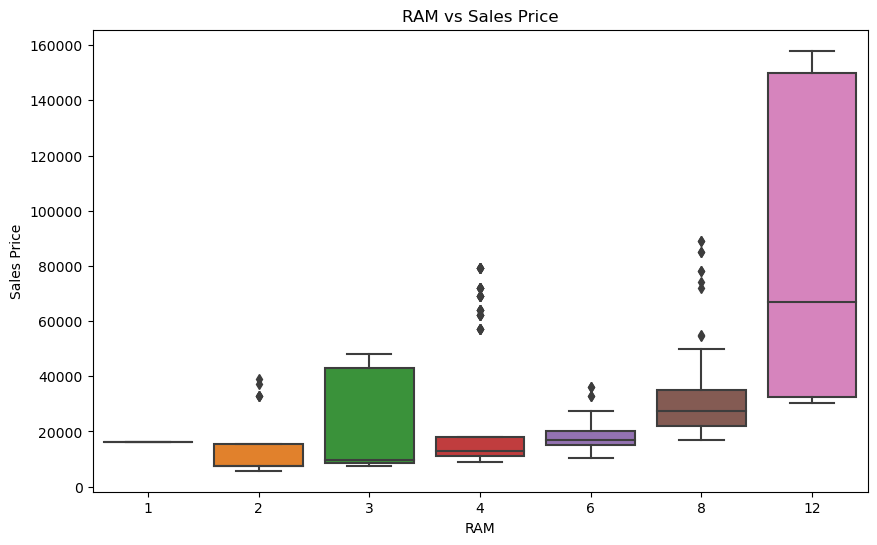

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RAM', y='sales_price', data=df)
plt.title('RAM vs Sales Price')
plt.xlabel('RAM')
plt.ylabel('Sales Price')
plt.show()

### Multivariate Analysis (Pairplot)

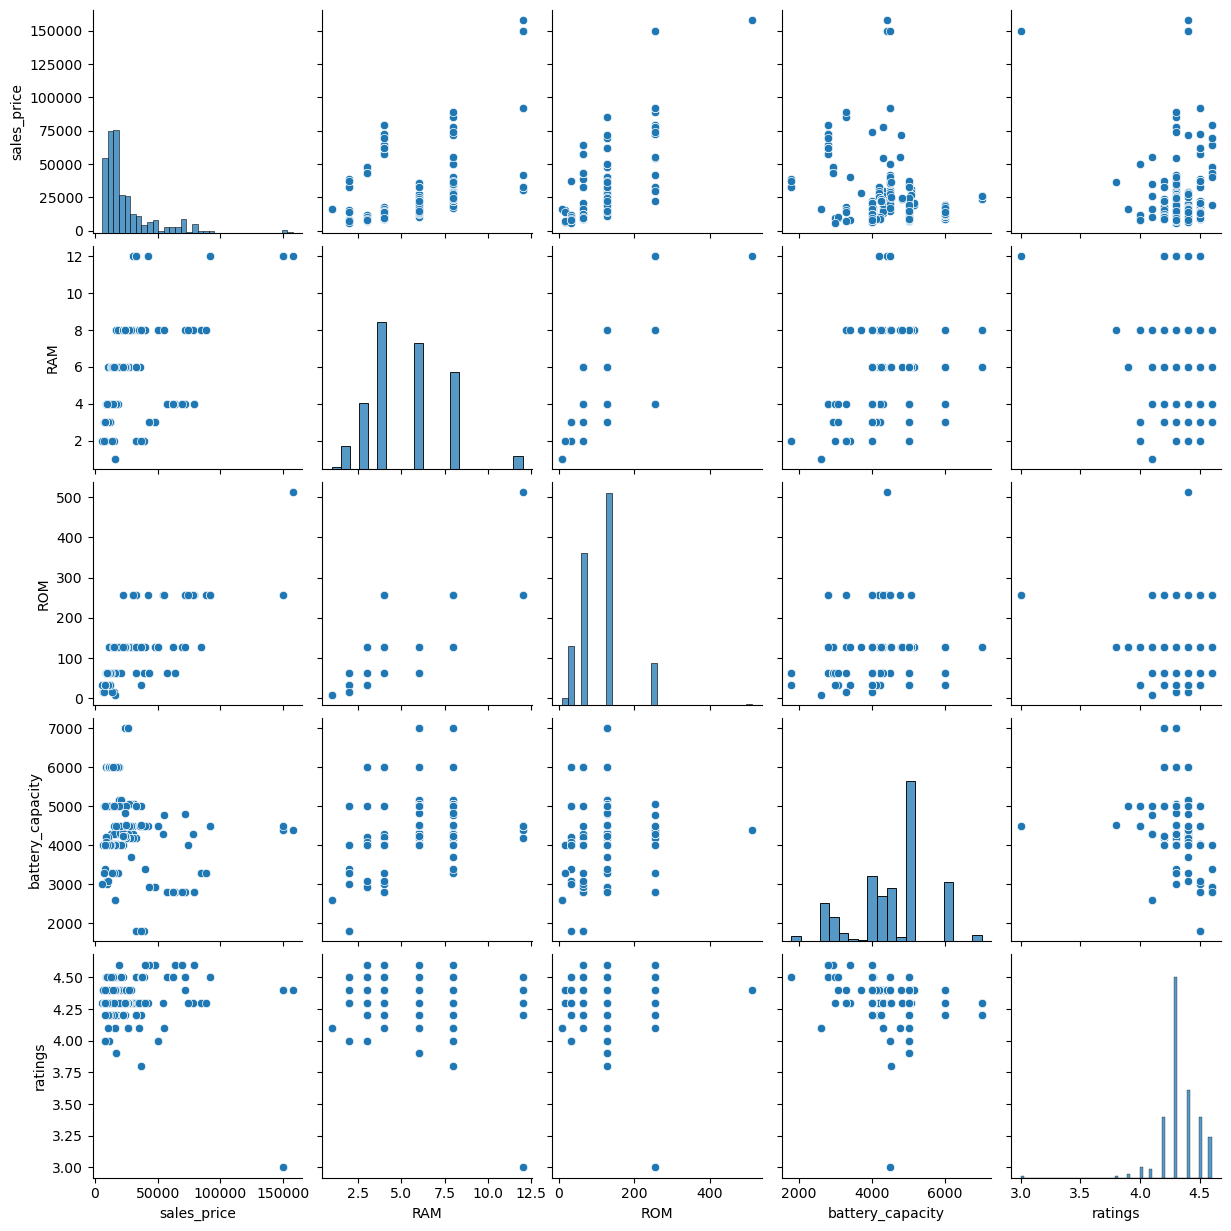

In [28]:
sns.pairplot(df[['sales_price', 'RAM', 'ROM', 'battery_capacity', 'ratings']])
plt.show()

### Correlation Matrix

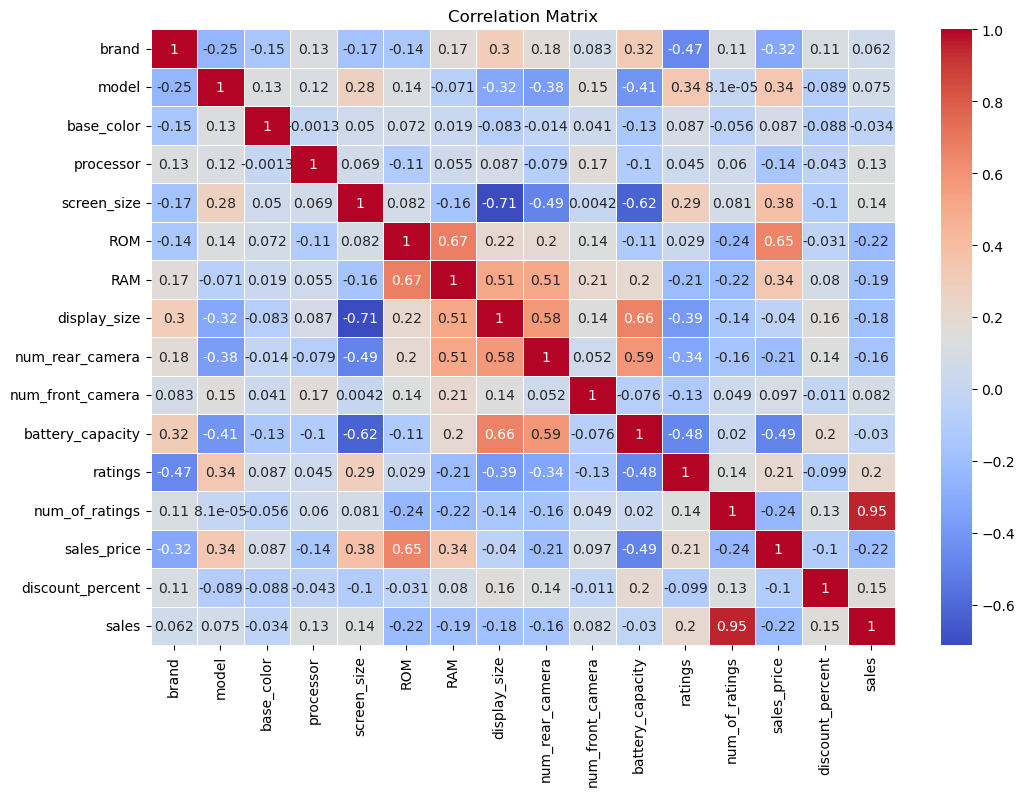

In [29]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Model Development:

For regression tasks where the target variable is continuous, it's generally not necessary to scale the target variable. Algorithms like Linear Regression, Decision Trees, Random Forest, and Gradient Boosting Machines can handle continuous target variables without requiring scaling.

# Section 2: Machine Learning Development

## Task 1: Model Development

In [30]:
y_scaled = df['sales_price']
y_scaled

0      32999
1      57149
2      32999
3      42999
4      69149
       ...  
425     7999
426     9699
427    21999
428     8299
429     8190
Name: sales_price, Length: 430, dtype: int64

In [31]:
x = df.drop(['sales_price'],axis=1)
x

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,discount_percent,sales
0,0,117,0,5,4,64,2,4.7,1,1,1800,4.5,38645,0.17,127.52
1,0,114,8,0,2,64,4,5.4,2,1,2815,4.5,244,0.04,1.39
2,0,117,8,5,4,64,2,4.7,1,1,1800,4.5,38645,0.17,127.52
3,0,118,6,6,1,64,3,6.1,1,1,2942,4.6,5366,0.10,23.07
4,0,113,8,0,1,128,4,6.1,2,1,2815,4.6,745,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,4,91,0,4,2,32,3,5.8,2,1,4000,4.3,1870,0.30,1.50
426,4,91,8,4,2,64,4,5.8,2,1,4000,4.3,1783,0.28,1.73
427,4,76,6,4,0,128,6,6.5,3,1,4250,4.2,1554,0.12,3.42
428,4,93,1,4,1,32,3,6.2,2,1,5000,4.2,8161,0.07,6.77


### Splitting data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y_scaled, test_size=0.2, random_state=42)

In [34]:
X_train

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,discount_percent,sales
66,1,70,0,4,0,64,4,6.5,3,1,6000,4.3,4687,0.08,5.16
132,2,9,7,2,0,128,6,6.5,3,1,5000,4.5,1206,0.14,2.17
407,4,100,1,4,1,64,4,6.3,2,2,4000,4.5,125016,0.12,174.90
31,0,114,8,0,2,128,4,5.4,2,1,2815,4.5,244,0.04,1.52
84,1,70,1,4,0,128,6,6.5,3,1,6000,4.3,39881,0.13,51.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,108,0,4,0,128,6,6.7,4,1,5160,4.4,10279,0.20,19.53
106,1,107,4,4,0,128,6,6.7,4,1,6000,4.3,26752,0.19,45.48
270,3,54,0,3,1,128,6,6.4,4,1,6000,4.3,5029,0.01,8.85
348,3,39,1,4,0,128,8,6.7,4,1,5000,4.3,126,0.16,0.44


In [35]:
y_train

66     10999
132    17999
407    13990
31     62149
84     12999
       ...  
71     18999
106    16999
270    17599
348    34999
102    11499
Name: sales_price, Length: 344, dtype: int64

### Training and evalution of model

#### LinearRegression

In [36]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [38]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 105951272.86463283
Testing MSE: 121103172.90689887
Training R2 Score: 0.8005246391107558
Testing R2 Score: 0.6929484968466334


#### KNN

In [40]:
mse_values = []
r2_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

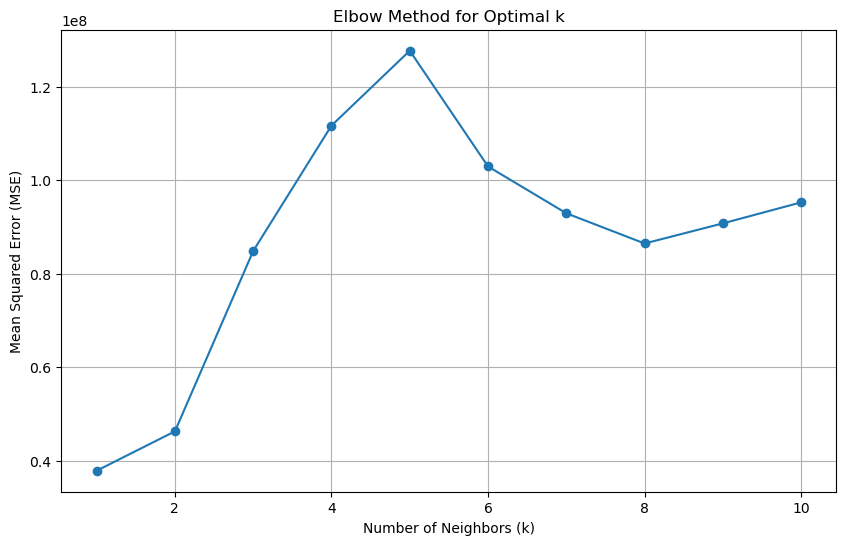

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [42]:
# Choose the optimal k based on the elbow curve (lowest MSE)
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")

Optimal number of neighbors (k): 1


In [43]:
# Train the KNN model with the optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [44]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [45]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0
Testing MSE: 37814559.77906977
Training R2 Score: 1.0
Testing R2 Score: 0.9041229297090962


#### DecisionTreeRegressor

In [46]:
# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [47]:
# Initialize the Decision Tree model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

In [48]:
# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [49]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [50]:
# Train the Decision Tree model with the best hyperparameters
best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=5)

In [51]:
# Make predictions
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)

In [52]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 2384318.3781727734
Testing MSE: 12301824.60924055
Training R2 Score: 0.9955110235478857
Testing R2 Score: 0.9688092917210329


#### RandomForestRegressor

In [53]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [54]:
# Initialize the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [55]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [56]:
# Train the Random Forest model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [57]:
# Make predictions
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)

In [58]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 2885603.1508929506
Testing MSE: 7757302.857584299
Training R2 Score: 0.9945672504506583
Testing R2 Score: 0.9803317167860803


#### XGBRegressor

In [59]:
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [60]:
# Initialize the XGBoost model
xgb_regressor = XGBRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [61]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [62]:
# Train the XGBoost model with the best hyperparameters
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [63]:
# Make predictions
y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)

In [64]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 43.475797325372696
Testing MSE: 6734864.110940856
Training R2 Score: 0.9999999181477472
Testing R2 Score: 0.982924063018664


## Task 2: Model Optimization

### Model comparison

In [65]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,1.059513e+08,1.211032e+08,0.800525,0.692948
1,Decision Tree,0.000000e+00,8.954568e+06,1.000000,0.977296
2,Random Forest,2.989637e+06,9.467458e+06,0.994371,0.975996
3,XGBoost,2.601235e+02,8.479064e+06,1.000000,0.978502


### Conclusion

XGBoost is the model to choose based on its low error and high R² score, suggesting it is the most accurate and well-generalized model for my data.

# Section 3: Data Visualization and Communication

## Task 1: Visualization Dashboard

https://public.tableau.com/app/profile/ramya.krishnan.a8410/viz/TechnologyProductsSalesDataSet/Dashboard1#2